In [1]:
import keras
import numpy as np

In [ ]:
#to ensure some degree of shift scale and distor
tion invariance local receptive elds shared weights

In [2]:
from keras import Model, Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

In [25]:
model = Sequential()
# layer_in = Input(shape=(32,32,1))

model.add(Conv2D(
                filters=6,
                kernel_size=(5,5),
                activation='relu',
                input_shape=(32,32,1)
                )
         )
#outs 28x28x6

model.add(MaxPooling2D(
                    pool_size=(2,2),
                    strides= 2
                    )
         )
#outs 14x14x6


model.add(Conv2D(
                filters=16,
                kernel_size=(5,5),
                activation='relu'
                )
         )
#outs 10x10x16


model.add(MaxPooling2D(
                pool_size=(2,2),
                strides=2
                )
         )
#outs 5x5x16


model.add(Conv2D(
                filters=120,
                kernel_size=(5,5),
                activation='relu'
                )
         )
#outs 1x1x120  

model.add(Dense(
                84,
                activation='relu'
                )
         )

model.add(Dense(
                10,
                activation='sigmoid'
                )
         )


In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 dense_6 (Dense)             (None, 1, 1, 84)         

In [28]:
model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=0.001),
            loss= 'sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

In [37]:
import glob
from PIL import Image
from matplotlib import pyplot as plt
from random import shuffle
import cv2

train_files=glob.glob("C:/Users/Rohan/GitHubstuff/test_git/CNN-implementation-of-reasearch-models/fingers/train/*")
shuffle(train_files)

X_train=np.zeros((len(train_files),32,32,1))
Y_train=np.zeros((len(train_files)))

for i,fl in enumerate(train_files):
    image = cv2.imread(fl)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray= cv2.resize(gray,(32,32))
    
    gray = np.array(gray)
    gray.resize((32,32,1))
    
    X_train[i,:,:,:]=gray
        
    Y_train[i]=fl[-6]

(32, 32, 1)


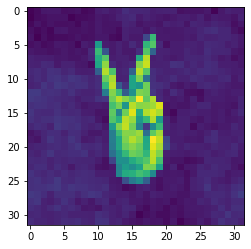

In [35]:
fl = train_files[0]
image = cv2.imread(fl)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (32,32))
gray= np.array(gray)
gray.resize((32,32,1))
print(gray.shape)
plt.imshow(gray)

In [38]:
model.fit(
    X_train,
    Y_train,
    validation_split= 0.2 ,
    epochs=3
)

Epoch 1/3
450/450 [==============================] - 17s 35ms/step - loss: 0.0891 - accuracy: 0.1910 - val_loss: 0.0243 - val_accuracy: 0.1916
Epoch 2/3
450/450 [==============================] - 12s 27ms/step - loss: 0.0020 - accuracy: 0.1923 - val_loss: 1.2914e-04 - val_accuracy: 0.1918
Epoch 3/3
450/450 [==============================] - 12s 27ms/step - loss: 3.2397e-05 - accuracy: 0.1914 - val_loss: 5.5700e-05 - val_accuracy: 0.1918
